In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from seaborn import regplot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/richarj2/Downloads/final_data_wins(in).csv')
# Step 1: Choose the columns to average
feature_cols = ['height', 'age', 'appearance', 'assists', 'goals conceded', 
                'games_injured', 'award', 'current_value', 'highest_value']

# Step 2: Group by team and average features
grouped_features = df.groupby('team')[feature_cols].mean()

# Step 3: Get unique target per team (assuming all players on a team share the same 'wins')
target = df.groupby('team')['wins'].first()  # or use .mean() if there's variation

# Step 4: Combine into final dataset
df = grouped_features.copy()
df['wins'] = target

# Done! Now `team_df` has one row per team

#df=df[df['position_encoded']==4]
df

,height,age,appearance,assists,goals conceded,games_injured,award,current_value,highest_value,wins
team,,,,,,,,,,
1.FC Köln,186.647059,24.823529,49.882353,0.098022,0.184745,26.352941,1.323529,2.996324e+06,5.617647e+06,0
1.FC Union Berlin,184.888889,27.592593,59.407407,0.105756,0.098266,24.555556,2.333333,4.670370e+06,6.770370e+06,0
1.FSV Mainz 05,186.666667,25.259259,53.259259,0.099091,0.159545,22.851852,1.481481,4.211111e+06,6.525926e+06,0
AA Argentinos Juniors,177.774678,25.866667,9.900000,0.050369,0.054579,4.233333,0.300000,8.150000e+05,1.288333e+06,0
AC Ajaccio,179.208012,28.433333,43.200000,0.043312,0.105117,17.200000,0.533333,9.050000e+05,1.875000e+06,22
...,...,...,...,...,...,...,...,...,...,...
Wolverhampton Wanderers,182.107143,26.250000,57.035714,0.101310,0.143143,29.214286,3.892857,1.423929e+07,2.326429e+07,25
Yokohama F. Marinos,176.216216,25.351351,11.270270,0.102654,0.081990,16.054054,2.000000,4.844595e+05,7.891892e+05,0
Yokohama FC,176.513514,25.621622,8.864865,0.074818,0.157258,11.432432,0.675676,3.560811e+05,5.540541e+05,0


In [3]:
features = ['height', 'appearance', 'assists', 'goals conceded', 'games_injured', 'award', 'current_value', 'highest_value']
target = 'wins'

X = df[features]
y = df[target]

# Separate numeric and categorical
X_number = X.select_dtypes(include=['number'])
#X_categorical = X.select_dtypes(include=['object'])

# Normalize
X_number = (X_number - X_number.mean()) / X_number.std(ddof=0)

# One-hot encode
#X_categorical = pd.get_dummies(X_categorical, dtype='int')

X = pd.concat([X_number], axis=1) #X_categorical

X = X.dropna()
y = y.loc[X.index]
X

,height,appearance,assists,goals conceded,games_injured,award,current_value,highest_value
team,,,,,,,,
1.FC Köln,2.480040,0.614465,0.322073,0.840165,1.104557,-0.342076,-0.134781,-0.090986
1.FC Union Berlin,1.662090,1.104810,0.564382,-0.581117,0.909821,0.160358,0.123177,0.022216
1.FSV Mainz 05,2.489162,0.788307,0.355585,0.426009,0.725235,-0.263486,0.052409,-0.001790
AA Argentinos Juniors,-1.647644,-1.443806,-1.170784,-1.299108,-1.291965,-0.851340,-0.470908,-0.516141
AC Ajaccio,-0.980816,0.270461,-1.391877,-0.468520,0.112893,-0.735244,-0.457039,-0.458528
...,...,...,...,...,...,...,...,...
Wolverhampton Wanderers,0.367942,0.982717,0.425090,0.156448,1.414566,0.936310,1.597679,1.641981
Yokohama F. Marinos,-2.372685,-1.373266,0.467196,-0.848613,-0.011264,-0.005494,-0.521842,-0.565159
Yokohama FC,-2.234373,-1.497095,-0.404857,0.388422,-0.511987,-0.664420,-0.541624,-0.588250


In [4]:
print({'mean':df['wins'].mean(),        # there are outliers, need to drop them for better R2
       'median':df['wins'].median(),
       'std':df['wins'].std(),
       'min':df['wins'].min(),
       'max':df['wins'].max()
       })

{'mean': 15.655080213903743, 'median': 0.0, 'std': 39.33687957585937, 'min': 0, 'max': 234}


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

y_pred = np.full_like(y_test, fill_value=y_train.mean(), dtype=np.float64)

mse = np.mean((y_test - y_pred) ** 2)

ss_total = np.sum((y_test - y_test.mean()) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print(f"Bias Regressor MSE: {mse:.2f}")
print(f"Bias Regressor R²: {r2:.4f}")

Bias Regressor MSE: 1327.15
Bias Regressor R²: -0.0088


In [6]:
K = []
R2_train = []
R2_test = []

for k in np.arange(20)+1:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    K.append(k)
    R2_train.append(knn.score(X_train, y_train))
    R2_test.append(knn.score(X_test,y_test))

In [7]:
# Store results in DataFrame
results = pd.DataFrame()
results['K'] = K
results['train R2'] = R2_train
results['test R2'] = R2_test
results.max()

K           20.00000
train R2     1.00000
test R2      0.22424
dtype: float64

Text(0, 0.5, 'R-Squared')

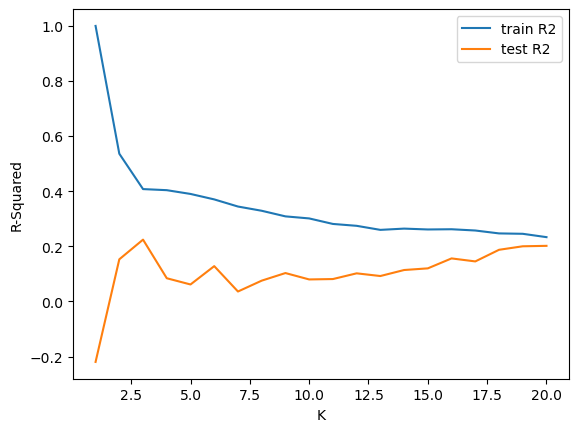

In [8]:
#Plot train R2/test R2 against K
ax1 = results.plot.line(x='K',y='train R2')
results.plot.line(x='K',y='test R2', ax=ax1)
plt.ylabel('R-Squared')

In [9]:
ix = results['test R2'].idxmax()
results.iloc[ix]

K           3.000000
train R2    0.407705
test R2     0.224240
Name: 2, dtype: float64

In [10]:
K = np.arange(100)+1 #Grid Search
grid = {'n_neighbors':K}
print(grid)

{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}


In [11]:
knnCV = GridSearchCV(knn, param_grid=grid, return_train_score=True, n_jobs=-1)

In [12]:
knnCV.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             return_train_score=True)

In [13]:
knnCV.best_params_

{'n_neighbors': 27}

In [14]:
results = pd.DataFrame()
results['neighbors'] = K
results['train_error'] = 1 - knnCV.cv_results_['mean_train_score']
results['valid_error'] = 1 - knnCV.cv_results_['mean_test_score']
results.head(3)

,neighbors,train_error,valid_error
0,1,0.000000,1.957606
1,2,0.456607,1.239375
2,3,0.567018,1.076802


<Axes: xlabel='neighbors'>

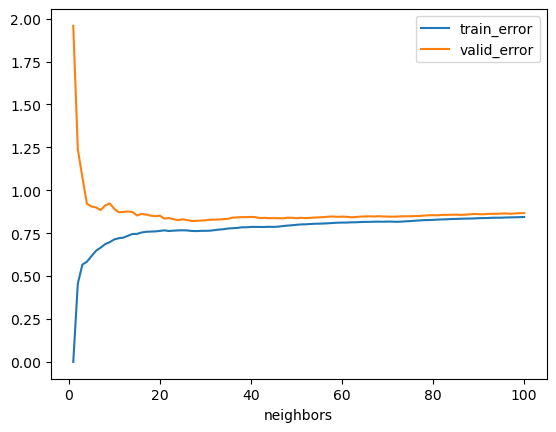

In [15]:
#Plot neighbors against train/valid error
ax1 = results.plot.line(x='neighbors', y='train_error')
results.plot.line(x='neighbors', y='valid_error', ax=ax1)

In [16]:
#Pull information regarding best parameter
ix = results['valid_error'].idxmin()
results.iloc[ix]

neighbors      27.000000
train_error     0.762969
valid_error     0.821184
Name: 26, dtype: float64

In [17]:
# Compute Test Results - R2
knn = KNeighborsRegressor(n_neighbors=42)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.19030846088435383


In [18]:
import pandas as pd
import numpy as np

# Get predictions
y_pred = knnCV.best_estimator_.predict(X_test)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred,
    'Absolute Error': np.abs(y_test - y_pred)
})

# Sort by Absolute Error
worst = results_df.sort_values(by='Absolute Error', ascending=False)
best = results_df.sort_values(by='Absolute Error', ascending=True)

# View top 5 worst and best predictions
print("🔻 Worst Predictions:")
print(worst.head(10))

print("\n✅ Best Predictions:")
print(best.head(10))

print("\n? Random Predictions:")
print(best.sample(10))


🔻 Worst Predictions:
                          Actual  Predicted       Error  Absolute Error
team                                                                   
FC Barcelona                 234  66.555556  167.444444      167.444444
Borussia Mönchengladbach     109  32.888889   76.111111       76.111111
OGC Nice                     106  34.296296   71.703704       71.703704
Arsenal FC                     0  62.888889  -62.888889       62.888889
AS Monaco                     95  34.777778   60.222222       60.222222
Inter Milan                    0  56.185185  -56.185185       56.185185
CA Osasuna                    67  12.518519   54.481481       54.481481
AC Milan                       0  54.333333  -54.333333       54.333333
Fulham FC                      0  53.481481  -53.481481       53.481481
RCD Mallorca                  67  15.333333   51.666667       51.666667

✅ Best Predictions:
                           Actual  Predicted  Error  Absolute Error
team                      

In [19]:
df[features + ['wins']].corr()['wins'].sort_values(ascending=False)

wins              1.000000
current_value     0.452749
highest_value     0.451729
appearance        0.370980
games_injured     0.360570
award             0.317427
height            0.244635
assists           0.207639
goals conceded    0.126340
Name: wins, dtype: float64

In [20]:
# Make sure predictions are generated
y_pred = knnCV.best_estimator_.predict(X_test)

# Create results DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred,
    'Absolute Error': np.abs(y_test - y_pred)
})

# Filter to only non-zero actual values
nonzero_results = results_df[results_df['Actual'] != 0]

# Sort to get best predictions (smallest absolute error)
best_nonzero = nonzero_results.sort_values(by='Absolute Error')

# Show top 5 best non-zero predictions
print("✅ Best Non-Zero Predictions:")
print(best_nonzero.head())

print("\nX Worst Non-Zero Predictions:")
print(best_nonzero.tail())


✅ Best Non-Zero Predictions:
                     Actual  Predicted      Error  Absolute Error
team                                                             
Sparta Rotterdam         15  15.703704  -0.703704        0.703704
Boavista FC              17  15.814815   1.185185        1.185185
Gil Vicente FC           26  18.037037   7.962963        7.962963
Real Betis Balompié      56  38.481481  17.518519       17.518519
VfL Bochum               13  31.259259 -18.259259       18.259259

X Worst Non-Zero Predictions:
                          Actual  Predicted       Error  Absolute Error
team                                                                   
CA Osasuna                    67  12.518519   54.481481       54.481481
AS Monaco                     95  34.777778   60.222222       60.222222
OGC Nice                     106  34.296296   71.703704       71.703704
Borussia Mönchengladbach     109  32.888889   76.111111       76.111111
FC Barcelona                 234  66.555556  1

Text(0.5, 1.0, 'Prediction vs Actual')

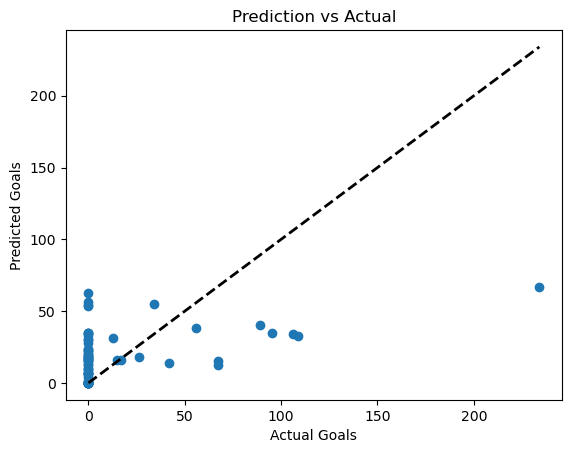

In [21]:
import matplotlib.pyplot as plt

y_pred = knnCV.best_estimator_.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Prediction vs Actual")
